# WEEK 1

In [ ]:
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_excel("/content/SLU Opportunity Wise Data-1710158595043.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8558 entries, 0 to 8557
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Learner SignUp DateTime  8558 non-null   object        
 1   Opportunity Id           8558 non-null   object        
 2   Opportunity Name         8558 non-null   object        
 3   Opportunity Category     8558 non-null   object        
 4   Opportunity End Date     8558 non-null   object        
 5   First Name               8558 non-null   object        
 6   Date of Birth            8558 non-null   object        
 7   Gender                   8558 non-null   object        
 8   Country                  8558 non-null   object        
 9   Institution Name         8553 non-null   object        
 10  Current/Intended Major   8553 non-null   object        
 11  Entry created at         8558 non-null   datetime64[ns]
 12  Status Description       8558 non-

## Standardize column names

In [ ]:
df.rename(columns={
    "Date of Birth": "DOB",
    "Learner SignUp DateTime": "SignUp_DateTime",
    "Current/Intended Major": "Major"
}, inplace=True)
df

,SignUp_DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,DOB,Gender,Country,Institution Name,Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date
0,06/14/2023 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Faria,2001-12-01 00:00:00,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080,06/14/2023 12:36:09,2022-03-11 18:30:39
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Poojitha,08/16/2000,Female,India,SAINT LOUIS,Information Systems,2024-11-03 12:01:41,Started,1080,2023-01-05 06:08:21,2022-03-11 18:30:39
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Emmanuel,01/27/2002,Male,United States,Illinois Institute of Technology,Computer Science,2024-11-03 12:01:41,Started,1080,"45235 days, 0:21:29",2022-03-11 18:30:39
3,08/29/2023 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Amrutha Varshini,1999-01-11 00:00:00,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070,2023-09-10 22:02:42,2022-03-11 18:30:39
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,06/29/2024 18:52:39,Vinay Varshith,04/19/2000,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080,2023-06-01 15:40:10,2022-03-11 18:30:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8553,2024-05-03 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Selam,10/14/2006,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,2024-11-03 12:03:14,Team Allocated,1070,2024-05-03 17:10:41,2024-08-03 14:00:00
8554,2024-06-03 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Gowri Sailesh,05/18/1999,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,2024-06-03 18:22:11,2024-08-03 14:00:00
8555,02/29/2024 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Abiola,03/16/1999,Male,Nigeria,Tai Solarin university of Education,Political Science,2024-11-03 12:03:14,Team Allocated,1070,02/29/2024 15:10:06,2024-08-03 14:00:00
8556,12/23/2023 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,venumadhavi,1997-05-06 00:00:00,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,02/27/2024 06:48:47,2024-08-03 14:00:00


## Convert date columns

In [ ]:
date_cols = ["DOB", "SignUp_DateTime", "Apply Date", "Opportunity Start Date", "Opportunity End Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

## Checking for missing values

In [ ]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime            295
Opportunity Id               0
Opportunity Name             0
Opportunity Category         0
Opportunity End Date      1262
First Name                   0
DOB                          0
Gender                       0
Country                      0
Institution Name             5
Major                        5
Entry created at             0
Status Description           0
Status Code                  0
Apply Date                 307
Opportunity Start Date    4637
dtype: int64


## Handeling missing values

In [ ]:
df["Gender"] = df["Gender"].str.strip().str.title()
df["Gender"].replace({"": "Not Provided", "Na": "Not Provided"}, inplace=True)

df["Major"] = df["Major"].astype(str).str.strip()
df["Major"] = df["Major"].apply(lambda x: x if x.isalpha() or ' ' in x else "Other")

/tmp/ipython-input-91-2542866479.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].replace({"": "Not Provided", "Na": "Not Provided"}, inplace=True)


In [ ]:
df["Institution Name"].fillna("Unknown", inplace=True)
# === Remove duplicates ===
df.drop_duplicates(inplace=True)

# === Fill Apply Date with SignUp_DateTime if missing ===
df["Apply Date"].fillna(df["SignUp_DateTime"], inplace=True)

# Fill missing SignUp_DateTime using Apply Date where available
df.loc[df["SignUp_DateTime"].isna() & df["Apply Date"].notna(), "SignUp_DateTime"] = df["Apply Date"]

# === Drop rows where both Apply Date and SignUp_DateTime are missing ===
df.dropna(subset=["Apply Date", "SignUp_DateTime"], how="all", inplace=True)

# Drop rows with missing Opportunity End Date
df = df.dropna(subset=["Opportunity End Date"])

# Optional: Reset index after dropping
df.reset_index(drop=True, inplace=True)

/tmp/ipython-input-92-3222750259.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Institution Name"].fillna("Unknown", inplace=True)
/tmp/ipython-input-92-3222750259.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
# === Impute Opportunity End Date using median duration ===
df["Opportunity_Duration"] = (df["Opportunity End Date"] - df["Opportunity Start Date"]).dt.days
df["Opportunity End Date"].fillna(df["Opportunity Start Date"] + pd.to_timedelta(df["Opportunity_Duration"].median(), unit='d'), inplace=True)

/tmp/ipython-input-93-157192416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity_Duration"] = (df["Opportunity End Date"] - df["Opportunity Start Date"]).dt.days
/tmp/ipython-input-93-157192416.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Opportunity End Dat

In [ ]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime              0
Opportunity Id               0
Opportunity Name             0
Opportunity Category         0
Opportunity End Date         0
First Name                   0
DOB                          0
Gender                       0
Country                      0
Institution Name             0
Major                        0
Entry created at             0
Status Description           0
Status Code                  0
Apply Date                   0
Opportunity Start Date    3791
Opportunity_Duration      3791
dtype: int64


In [ ]:
df

,SignUp_DateTime,Opportunity Id,Opportunity Name,Opportunity Category,Opportunity End Date,First Name,DOB,Gender,Country,Institution Name,Major,Entry created at,Status Description,Status Code,Apply Date,Opportunity Start Date,Opportunity_Duration
0,2023-06-14 12:30:35,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Faria,2001-12-01,Female,Pakistan,Nwihs,Radiology,2024-11-03 12:01:41,Started,1080,2023-06-14 12:36:09,2022-03-11 18:30:39,841.0
1,2023-01-05 05:29:16,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Poojitha,2000-08-16,Female,India,SAINT LOUIS,Information Systems,2024-11-03 12:01:41,Started,1080,2023-01-05 06:08:21,2022-03-11 18:30:39,841.0
2,2023-09-04 20:35:08,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Emmanuel,2002-01-27,Male,United States,Illinois Institute of Technology,Computer Science,2024-11-03 12:01:41,Started,1080,2023-09-04 20:35:08,2022-03-11 18:30:39,841.0
3,2023-08-29 05:20:03,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Amrutha Varshini,1999-01-11,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:01:41,Team Allocated,1070,2023-09-10 22:02:42,2022-03-11 18:30:39,841.0
4,2023-06-01 15:26:36,00000000-0GN2-A0AY-7XK8-C5FZPP,Career Essentials: Getting Started with Your P...,Course,2024-06-29 18:52:39,Vinay Varshith,2000-04-19,Male,United States,Saint Louis University,Computer Science,2024-11-03 12:01:41,Started,1080,2023-06-01 15:40:10,2022-03-11 18:30:39,841.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,2024-05-03 16:39:21,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Selam,2006-10-14,Female,Ethiopia,Lideta Catholic Cathedral School,Computer Science,2024-11-03 12:03:14,Team Allocated,1070,2024-05-03 17:10:41,2024-08-03 14:00:00,-1.0
7235,2024-06-03 15:58:47,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Gowri Sailesh,1999-05-18,Male,United States,SAINT LOUIS UNIVERSITY,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,2024-06-03 18:22:11,2024-08-03 14:00:00,-1.0
7236,2024-02-29 15:02:31,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,Abiola,1999-03-16,Male,Nigeria,Tai Solarin university of Education,Political Science,2024-11-03 12:03:14,Team Allocated,1070,2024-02-29 15:10:06,2024-08-03 14:00:00,-1.0
7237,2023-12-23 03:53:12,00000000-10GQ-RJHT-3G4S-BKGBY1,Freelance Mastery workshop,Event,2024-08-03 11:30:00,venumadhavi,1997-05-06,Female,United States,Saint Louis University,Information Systems,2024-11-03 12:03:14,Team Allocated,1070,2024-02-27 06:48:47,2024-08-03 14:00:00,-1.0


## Feature Engineering

In [ ]:
# === Add date flags ===
df["Has_Start_Date"] = df["Opportunity Start Date"].notnull().astype(int)
df["Has_End_Date"] = df["Opportunity End Date"].notnull().astype(int)
df["Has_Apply_Date"] = df["Apply Date"].notnull().astype(int)

# Engagement Lag (days between Apply Date and Start Date)
df["Engagement_Lag"] = (df["Opportunity Start Date"] - df["Apply Date"]).dt.days

# Opportunity Duration (end - start)
df["Opportunity_Duration"] = (df["Opportunity End Date"] - df["Opportunity Start Date"]).dt.days

# Signup Month & Day of Week
df["Signup_Month"] = df["SignUp_DateTime"].dt.month
df["Signup_Weekday"] = df["SignUp_DateTime"].dt.day_name()

# Normalize Age and Opportunity Duration
scaler = MinMaxScaler()
df[["Norm_Opportunity_Duration"]] = scaler.fit_transform(df[["Opportunity_Duration"]])

# Composite Engagement Score
df["Engagement_Score"] = (
    0.4 * df["Norm_Opportunity_Duration"] +
    0.3 * df["Age"] +
    0.3 * df["Engagement_Lag"].fillna(0)
)

/tmp/ipython-input-97-4214226044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Has_Start_Date"] = df["Opportunity Start Date"].notnull().astype(int)
/tmp/ipython-input-97-4214226044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Has_End_Date"] = df["Opportunity End Date"].notnull().astype(int)
/tmp/ipython-input-97-4214226044.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:

# Fill missing values in 'Opportunity Start Date' with that mode
df["Opportunity Start Date"] = df["Opportunity Start Date"].fillna(df["Opportunity Start Date"].mode()[0])

# Recalculate Age based on (Start Date - DOB)
df["Age"] = (df["Opportunity Start Date"] - df["DOB"]).dt.days // 365


/tmp/ipython-input-99-3434261820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Opportunity Start Date"] = df["Opportunity Start Date"].fillna(df["Opportunity Start Date"].mode()[0])
/tmp/ipython-input-99-3434261820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age"] = (df["Opportunity Start Date"] - df["DOB"]).dt.days // 365


In [ ]:
print("\nMissing Values by Column:\n", df.isnull().sum())


Missing Values by Column:
 SignUp_DateTime                 0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
First Name                      0
DOB                             0
Gender                          0
Country                         0
Institution Name                0
Major                           0
Entry created at                0
Status Description              0
Status Code                     0
Apply Date                      0
Opportunity Start Date       3791
Opportunity_Duration         3791
Has_Start_Date                  0
Has_End_Date                    0
Has_Apply_Date                  0
Age                          3791
Engagement_Lag               3791
Signup_Month                    0
Signup_Weekday                  0
Norm_Opportunity_Duration    3791
Engagement_Score             3791
dtype: int64


In [ ]:
df.info()

In [ ]:
# Save updated dataset
df.to_csv("Week1_Cleaned_dataset.csv", index=False)

# Week 2


Missing Values by Column:
 SignUp_DateTime                 0
Opportunity Id                  0
Opportunity Name                0
Opportunity Category            0
Opportunity End Date            0
First Name                      0
DOB                             0
Gender                          0
Country                         0
Institution Name                0
Major                           5
Entry created at                0
Status Description              0
Status Code                     0
Apply Date                      0
Opportunity Start Date       3791
Opportunity_Duration         3791
Has_Start_Date                  0
Has_End_Date                    0
Has_Apply_Date                  0
Age                          3791
Engagement_Lag               3791
Signup_Month                    0
Signup_Weekday                  0
Norm_Age                     3791
Norm_Opportunity_Duration    3791
Engagement_Score             3791
dtype: int64


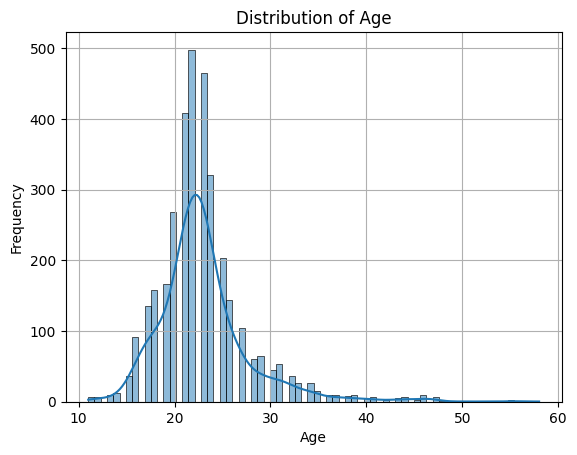

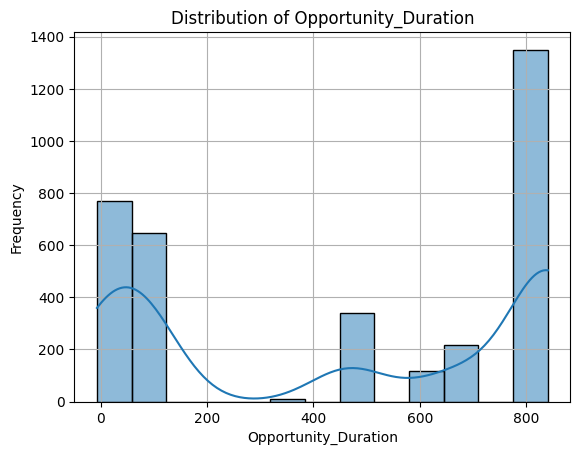

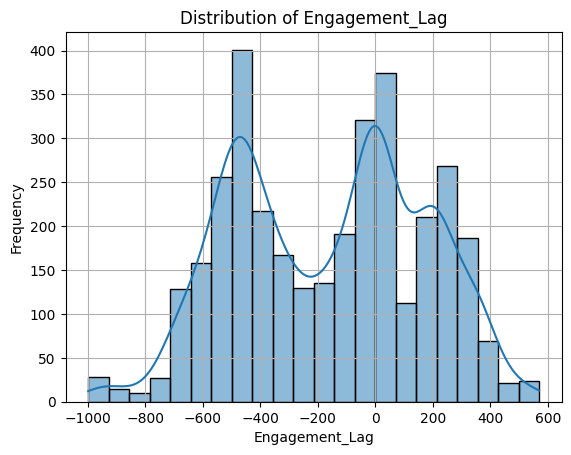

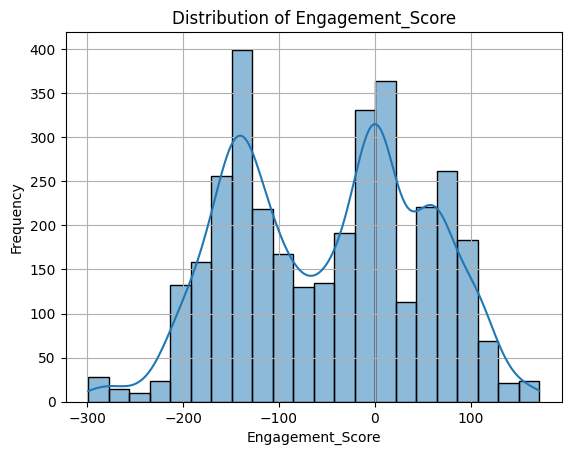

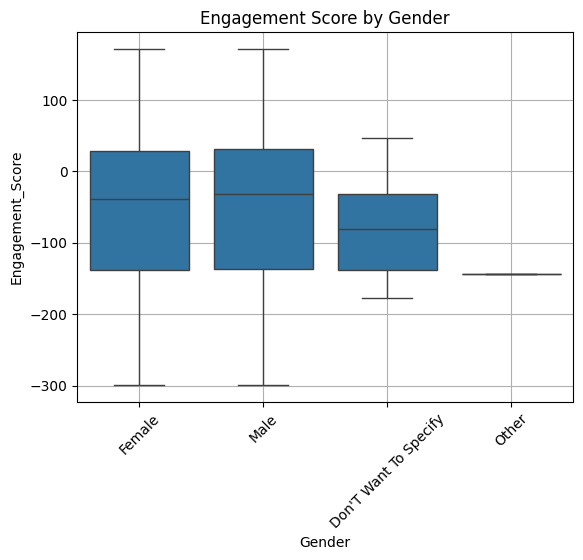

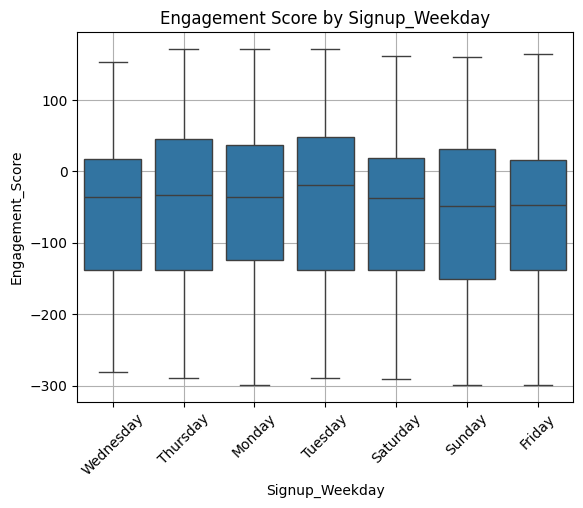

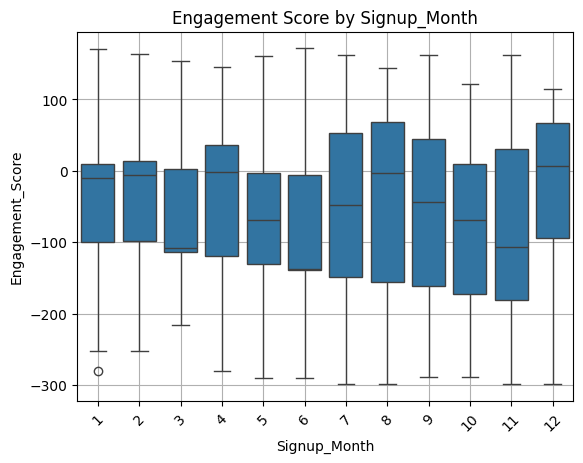

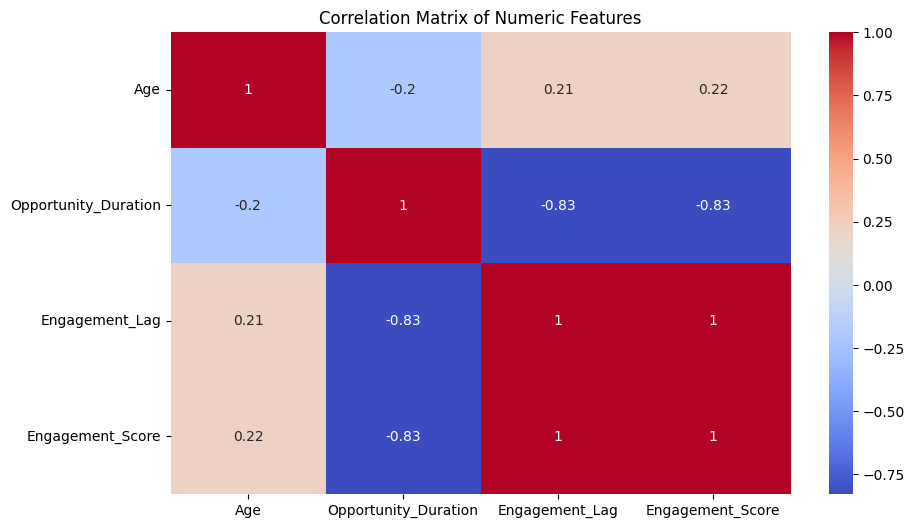

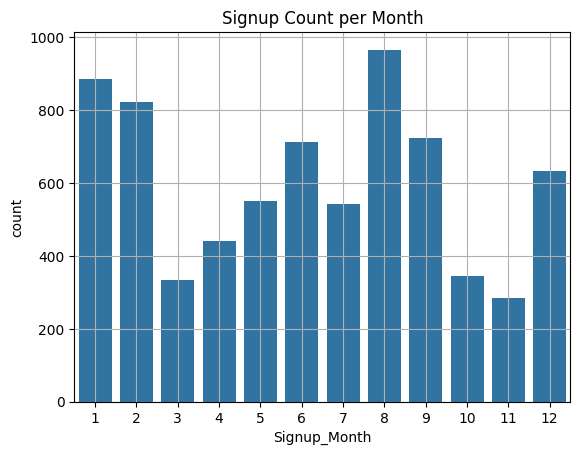

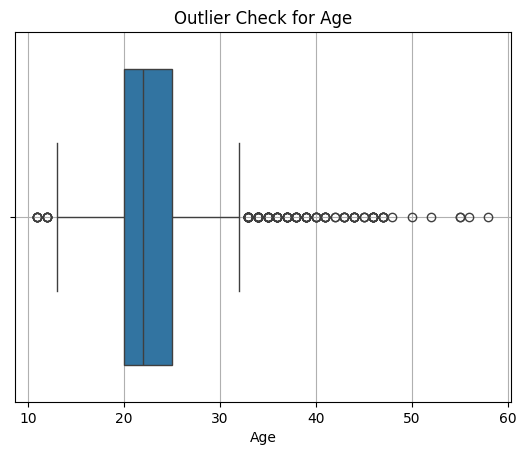

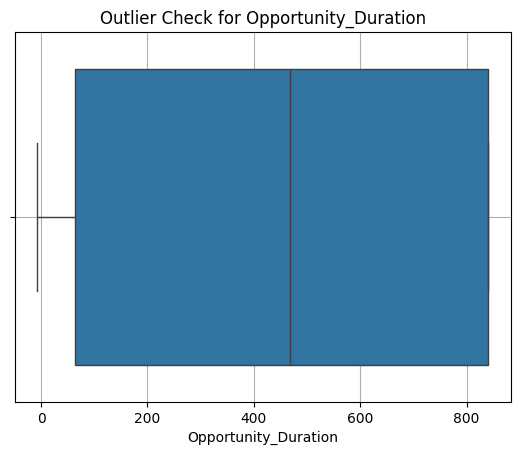

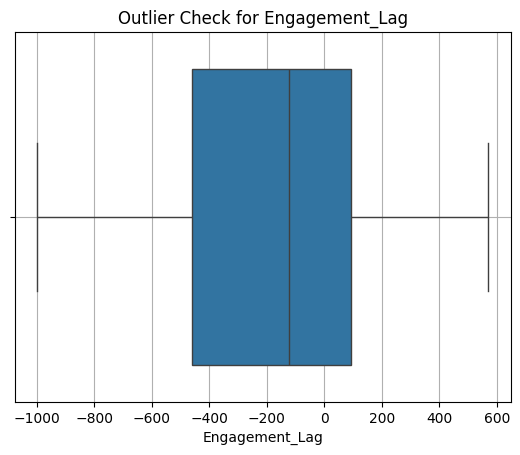

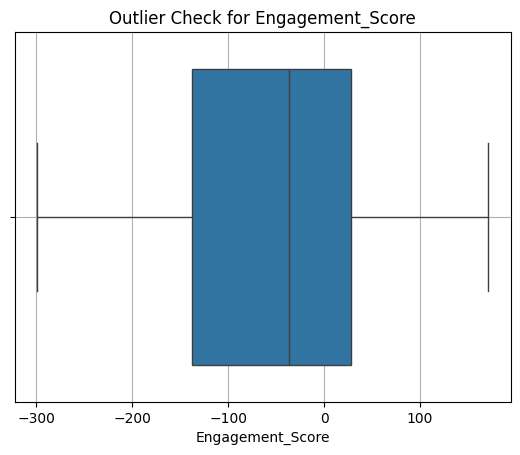

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler

# Load cleaned dataset from Week 1
df = pd.read_csv(r"/content/Week1_Cleaned_dataset.csv")

# === Basic Missing Value Overview ===
print("\nMissing Values by Column:\n", df.isnull().sum())

# === Distribution Plots ===
numeric_cols = ["Age", "Opportunity_Duration", "Engagement_Lag", "Engagement_Score"]
for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

# === Category-wise Averages ===
categories = ["Gender", "Signup_Weekday", "Signup_Month"]
for cat in categories:
    plt.figure()
    sns.boxplot(x=cat, y="Engagement_Score", data=df)
    plt.title(f"Engagement Score by {cat}")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# === Correlation Heatmap ===
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

# === Signup Trend ===
plt.figure()
sns.countplot(x="Signup_Month", data=df)
plt.title("Signup Count per Month")
plt.grid(True)
plt.show()

# === Outlier Boxplots ===
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check for {col}")
    plt.grid(True)
    plt.show()

/tmp/ipython-input-77-3815054352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


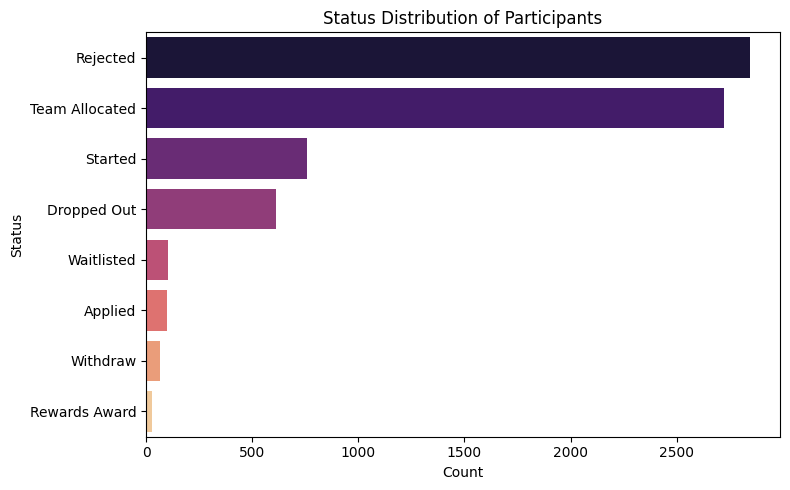

In [ ]:
plt.figure(figsize=(8, 5))
status_counts = df['Status Description'].value_counts()
sns.barplot(
    x=status_counts.values,
    y=status_counts.index,
    palette='magma'
)
plt.title('Status Distribution of Participants')
plt.xlabel('Count')
plt.ylabel('Status')
plt.tight_layout()
plt.show()


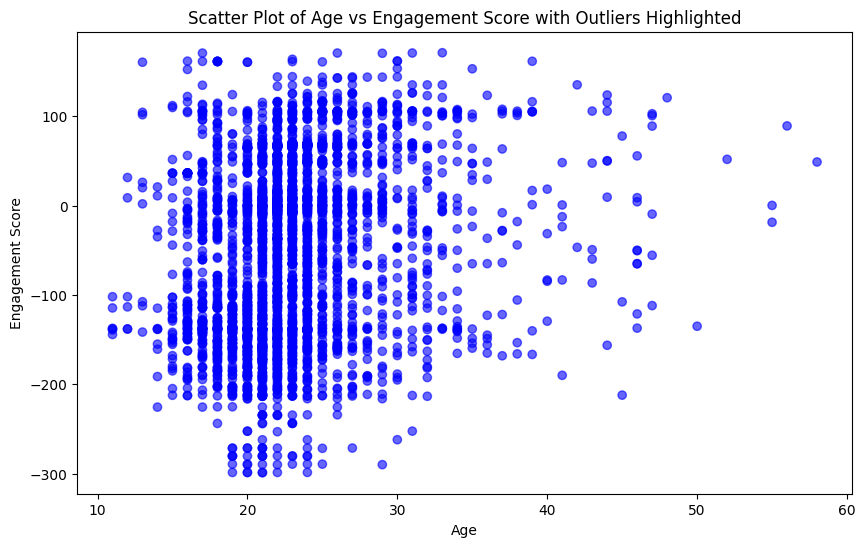

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore

# Z-scores
df['Age_z'] = zscore(df['Age'])
df['Engagement_Score_z'] = zscore(df['Engagement_Score'])

# Outlier condition
outliers = (np.abs(df['Age_z']) > 3) | (np.abs(df['Engagement_Score_z']) > 3)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Engagement_Score'], c=outliers.map({True: 'red', False: 'blue'}), alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Engagement Score')
plt.title('Scatter Plot of Age vs Engagement Score with Outliers Highlighted')
plt.show()


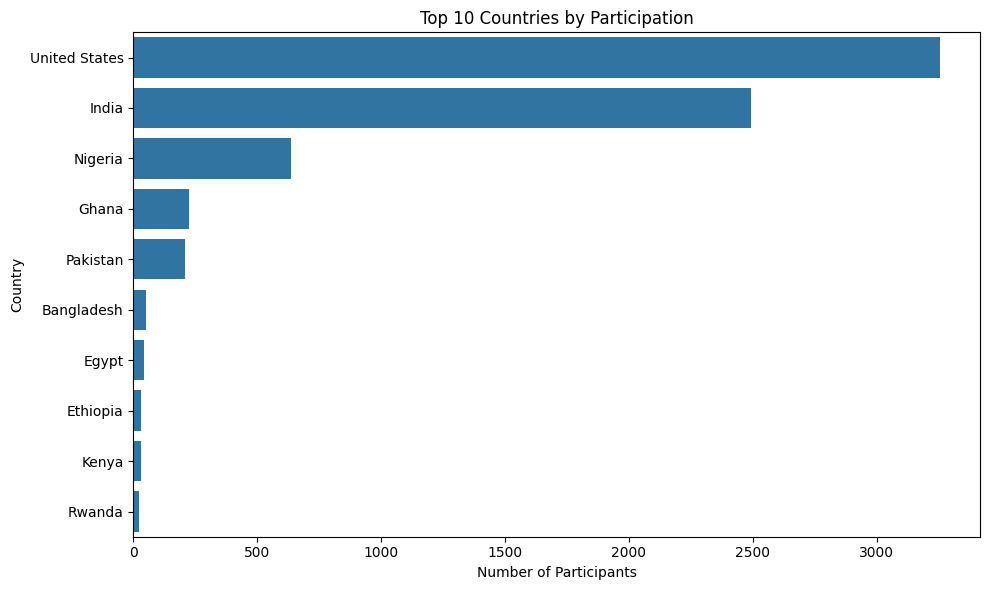

In [ ]:
# Count top 10 countries directly from the 'Country' column
top_countries = df['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Participation')
plt.xlabel('Number of Participants')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
df[df["Opportunity Start Date"].isna()]["Status Description"].value_counts()

,count
Status Description,
Rejected,2844
Team Allocated,402
Dropped Out,311
Waitlisted,105
Applied,101
Withdraw,28


In [ ]:
df[df["Opportunity Start Date"].notna()]["Status Description"].value_counts()

,count
Status Description,
Team Allocated,2321
Started,760
Dropped Out,301
Withdraw,37
Rewards Award,29


# WEEK -3

In [ ]:
df['Churned'] = df['Status Description'].isin(['Dropped Out', 'Rejected', 'Withdraw']).astype(int)
correlation = df[['Churned', 'Has_Start_Date']].corr()
print(correlation)


                 Churned  Has_Start_Date
Churned         1.000000       -0.741034
Has_Start_Date -0.741034        1.000000


/tmp/ipython-input-102-292965803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Churned'] = df['Status Description'].isin(['Dropped Out', 'Rejected', 'Withdraw']).astype(int)


In [ ]:
# Define the list of relevant columns
selected_columns = [
    "Churned",       # Target variable
    "Gender",                   # Categorical
    "Country",                  # Categorical
    "Opportunity Category",     # Categorical
    "Signup_Weekday",           # Temporal/Categorical
    "Signup_Month",             # Temporal/Numeric
    "Has_Apply_Date",           # Binary
    "Has_End_Date",             # Binary
    "Has_Start_Date",           # Binary
    "Opportunity_Duration",     # Numeric
    "Engagement_Lag",           # Numeric
    "Engagement_Score",         # Numeric
    "Age"                       # or use "Norm_Age" if preferred
]

# Subset the dataset
df_subset = df[selected_columns].copy()

# Display the first few rows
df_subset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239 entries, 0 to 7238
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Churned               7239 non-null   int64  
 1   Gender                7239 non-null   object 
 2   Country               7239 non-null   object 
 3   Opportunity Category  7239 non-null   object 
 4   Signup_Weekday        7239 non-null   object 
 5   Signup_Month          7239 non-null   int32  
 6   Has_Apply_Date        7239 non-null   int64  
 7   Has_End_Date          7239 non-null   int64  
 8   Has_Start_Date        7239 non-null   int64  
 9   Opportunity_Duration  3448 non-null   float64
 10  Engagement_Lag        3448 non-null   float64
 11  Engagement_Score      3448 non-null   float64
 12  Age                   7239 non-null   int64  
dtypes: float64(3), int32(1), int64(5), object(4)
memory usage: 707.1+ KB


In [ ]:
# === Basic Missing Value Overview ===
print("\nMissing Values by Column:\n", df_subset.isnull().sum())


Missing Values by Column:
 Churned                    0
Gender                     0
Country                    0
Opportunity Category       0
Signup_Weekday             0
Signup_Month               0
Has_Apply_Date             0
Has_End_Date               0
Has_Start_Date             0
Opportunity_Duration    3791
Engagement_Lag          3791
Engagement_Score        3791
Age                        0
dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# === Step 1: Impute missing values using median for numeric features ===
df_subset['Opportunity_Duration'].fillna(df_subset['Opportunity_Duration'].median(), inplace=True)
df_subset['Engagement_Lag'].fillna(df_subset['Engagement_Lag'].median(), inplace=True)

# === Step 2: Normalize 'Age' and 'Opportunity_Duration' ===
scaler = MinMaxScaler()
df_subset[['Norm_Age', 'Norm_Opportunity_Duration']] = scaler.fit_transform(
    df_subset[['Age', 'Opportunity_Duration']]
)

# === Step 3: Recompute Engagement Score ===
df_subset['Engagement_Score'] = (
    0.4 * df_subset['Norm_Opportunity_Duration'] +
    0.3 * df_subset['Norm_Age'] +
    0.3 * df_subset['Engagement_Lag']
)

# Optional: drop the original Age/Duration columns if you're using normalized ones only
# df_subset.drop(columns=['Age', 'Opportunity_Duration'], inplace=True)

# Final check
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7239 entries, 0 to 7238
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churned                    7239 non-null   int64  
 1   Gender                     7239 non-null   object 
 2   Country                    7239 non-null   object 
 3   Opportunity Category       7239 non-null   object 
 4   Signup_Weekday             7239 non-null   object 
 5   Signup_Month               7239 non-null   int32  
 6   Has_Apply_Date             7239 non-null   int64  
 7   Has_End_Date               7239 non-null   int64  
 8   Has_Start_Date             7239 non-null   int64  
 9   Opportunity_Duration       7239 non-null   float64
 10  Engagement_Lag             7239 non-null   float64
 11  Engagement_Score           7239 non-null   float64
 12  Age                        7239 non-null   int64  
 13  Norm_Age                   7239 non-null   float

/tmp/ipython-input-108-3574784148.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_subset['Opportunity_Duration'].fillna(df_subset['Opportunity_Duration'].median(), inplace=True)
/tmp/ipython-input-108-3574784148.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# One-hot encode categorical columns
df_model = pd.get_dummies(df_subset, columns=[
    'Gender',
    'Country',
    'Opportunity Category',
    'Signup_Weekday'
], drop_first=True)

# Define features (X) and target (y)
X = df_model.drop(columns=['Churned'])
y = df_model['Churned']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### LOGISTIC REGRESSION

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, lr_preds))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.98      0.84      0.90      1116
           1       0.85      0.98      0.91      1056

    accuracy                           0.91      2172
   macro avg       0.92      0.91      0.91      2172
weighted avg       0.92      0.91      0.91      2172



### DECISION TREE

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, dt_preds))


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1116
           1       0.88      0.87      0.88      1056

    accuracy                           0.88      2172
   macro avg       0.88      0.88      0.88      2172
weighted avg       0.88      0.88      0.88      2172



### RANDOM FOREST

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, rf_preds))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1116
           1       0.88      0.92      0.90      1056

    accuracy                           0.90      2172
   macro avg       0.90      0.90      0.90      2172
weighted avg       0.90      0.90      0.90      2172



### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)

print("Naive Bayes Results:")
print(classification_report(y_test, nb_preds))


Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88      1116
           1       0.83      0.97      0.89      1056

    accuracy                           0.89      2172
   macro avg       0.90      0.89      0.89      2172
weighted avg       0.90      0.89      0.89      2172



### SVM

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

print("SVM Results:")
print(classification_report(y_test, svm_preds))

SVM Results:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1116
           1       0.77      0.99      0.87      1056

    accuracy                           0.85      2172
   macro avg       0.88      0.85      0.85      2172
weighted avg       0.88      0.85      0.85      2172



### XGBOOST

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("XGBoost Results:")
print(classification_report(y_test, xgb_preds))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:02:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      1116
           1       0.87      0.96      0.91      1056

    accuracy                           0.91      2172
   macro avg       0.91      0.91      0.91      2172
weighted avg       0.92      0.91      0.91      2172



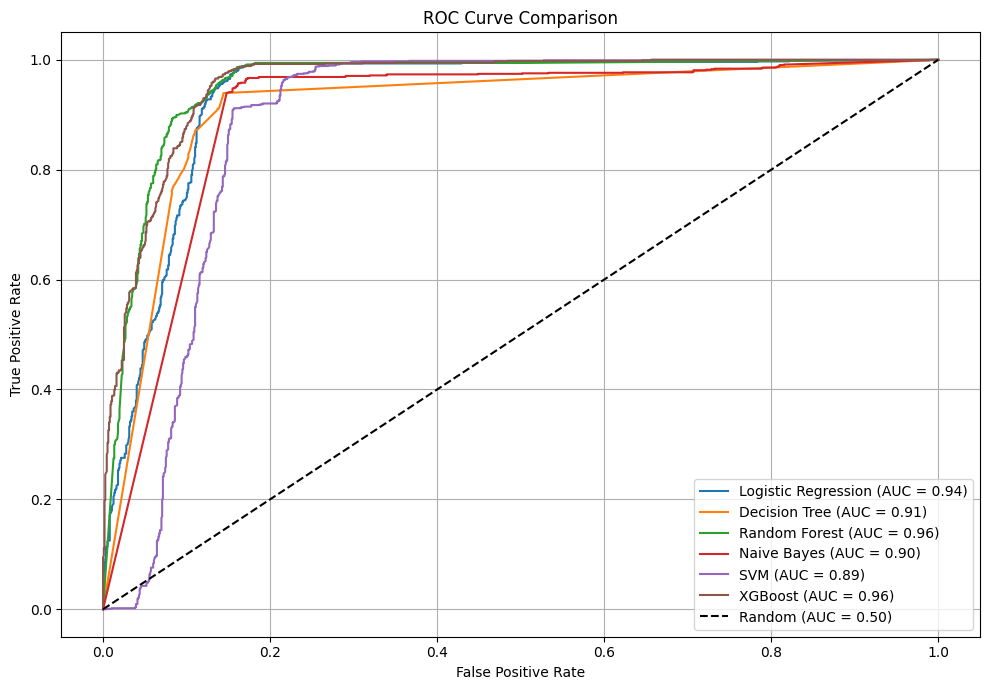

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Dictionary of trained models
models = {
    "Logistic Regression": lr_model,
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Naive Bayes": nb_model,
    "SVM": svm_model,
    "XGBoost": xgb_model
}

# Initialize ROC plot
plt.figure(figsize=(10, 7))

# Plot ROC for each model
for name, model in models.items():
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    auc = roc_auc_score(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')

# Labels and title
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
